# Instrucciones

- El desafío es individual, por lo cual se considera que todo el código entregado es de elaboración propia y no ha sido compartido de forma alguna.
- Las consultas sobre el desafío se deben realizar por medio de la plataforma Aula. **No está permitido publicar código en consultas de Aula**.
- El desafío debe ser realizado en Jupyter Notebook (Python3) utilizando este archivo como base.
- Debe utilizar arreglos de ```NumPy``` junto a las funciones y bibliotecas que se ponen a disposición en este archivo.
- Se debe respetar las firmas de las funciones, sus parámetros y retornos. Para eso se incluye un detalle de cada función tanto de las entregadas como las que deberá implementar. En caso de no seguir estas instrucciones, el desafío no podrá evaluarse.
- Se evaluará la correcta utilización de librerias ```NumPy```, ```SciPy```, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
- Evitar la impresión de mensajes salvo que se solicite en el enunciado.
- El archivo de entrega debe denominarse **ROL-desafio-numero.ipynb**. **De no respetarse este formato existirá un descuento de 50 puntos**
- La fecha de entrega es el **martes 16 de junio a las 12:00 hrs**,  posteriormente existirá un descuento lineal hasta las 13:00 hrs del mismo día.

# Interpolación Polinomial
# Introducción

En este desafío estudiaremos la **matriz de Vandermonde** como método de interporlación. Sea $P(x)$ el polinomio de interpolación definido como:

\begin{equation}
    P(x) = a_0x^0 + a_1x^1 + \cdots + a_{n-1}x^{n-1}= \sum_{i=0}^{n-1}a_ix^i,
\end{equation}

entonces la **matriz de Vandermonde** emerge del problema de obtener los coeficientes $a_i$ para $n$ puntos $(x_i, y_i)$.
Por ejemplo si tenemos los puntos $(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)$, podemos generar las siguientes $n$ ecuaciones:

\begin{equation}
    \begin{split}
        a_0x_1^0 + a_1x_1^1 + \cdots + a_{n-1}x_1^{n-1} &= y_1 \\
        a_0x_2^0 + a_1x_2^1 + \cdots + a_{n-1}x_2^{n-1} &= y_2 \\
            \vdots     & \\
        a_0x_n^0 + a_1x_n^1 + \cdots + a_{n-1}x_n^{n-1} &= y_n \\
    \end{split},
\end{equation}

entonces la **matriz de Vandermonde** queda definida como:

\begin{equation}
    V = 
    \begin{bmatrix}
        1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
        \vdots & \vdots & \vdots & & \vdots \\
        1 & x_n & x_n^2 & \cdots & x_n^{n-1} \\
    \end{bmatrix}.
\end{equation}

Luego para obtener los coeficientes $a_i$, debemos resolver el siguiente problema:

\begin{equation}
    \begin{split}
        V\, \mathbf{a} & = \mathbf{y} \\
        \begin{bmatrix}
        1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
        \vdots & \vdots & \vdots & & \vdots \\
        1 & x_n & x_n^2 & \cdots & x_n^{n-1} \\
    \end{bmatrix}
    \begin{bmatrix}
        a_0 \\ a_1 \\ \vdots \\ a_{n-1} 
    \end{bmatrix} & =
    \begin{bmatrix}
        y_1 \\ y_2 \\ \vdots \\ y_{n} 
    \end{bmatrix}
    \end{split}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as spla

Su primera tarea será implementar la función llamada ```interpolateVandermonde(x, y)``` que reciba como input un arreglo con los puntos $x_i$ y otro arreglo con los puntos $y_i$ . Luego, su función deberá realizar una interpolación utilizando la matriz de Vandermonde y finalmente retornar un arreglo con los coeficientes resultantes de la interpolación.

In [2]:
def interpolateVandermonde(x, y):
    """
    Compute Polynomial coefficients using Vandermonde Matrix

    Parameters
    -----------
    x     : (n, ) array
            Data x_i to interpolate
    y     : (n, ) array
            Data y_i to interpolate

    Returns
    -------
    a     : (n, ) array
            Coefficients of the interpolating polynomial
    """
    
    n = x.shape[0]
    V = []
    #Se crea una fila de la matriz de Vandermonde para cada x
    for x_i in x:
        #Cada miembro de la fila sera x^i, donde i es la posicion, lo que genera [1, x, x^2, ... , x^n-1]
        V.append(x_i**np.arange(n))
    V = np.array(V)
    
    #Resolvemos el sistema de ecuaciones usando cualquier metodo ya conocido.
    P, L, U = spla.lu(V)

    # Vector permutation
    Pb = np.dot(P.T, y)

    # Forward substitution
    c = spla.solve_triangular(L, Pb, lower=True)

    # Backward substituion
    a = spla.solve_triangular(U, c)
    
    return a

Construya la función ```interpolatingPolynomial(a)``` que reciba como **input** los coeficientes $a_i$ obtenidos de la función ```interpolateVandermonde(x, y)```. Su implementación debe retornar una función que permita evaluar el polinomio $P(x)$ para cualquier valor de $x$. Asegúrese que su función $P(x)$ pueda evaluar arreglos ```numpy.array```.

In [3]:
def interpolatingPolynomial(a):
    """
    Build interpolating polynomial using a coefficients

    Parameters
    -----------
    a     : (n, ) array
            Coefficients of the interpolating polynomial

    Returns
    -------
    P     : Function
            Interpolation polynomial P(x)
    """
    #Definiremos una funcion que dado el input genere una matriz soluciones o un arreglo con estas, donde la evaluacion es 
    # a_0 + a_1x + a_2x^2 + ... + a_n-1x^n-1 en caso de que x sea un entero.
    #Para cuando x es un arreglo, se tiene:
    #[a_00 + a_01x + a_02x^2 + ... + a_0n-1x^n-1, 
    # a_10 + a_11x + a_12x^2 + ... + a_1n-1x^n-1,
    # ..., 
    # a_{m-1}0 + a_{m-1}1x + a_{m-1}2x^2 + ... + a_{m-1}n-1x^n-1]
    P = lambda x: np.array([a@(x_i**np.arange(len(a))) for x_i in x]) if type(x)==np.ndarray else a@(x**np.arange(len(a)))
    return P

Suponga que generamos una grilla fina a partir de $x$ que denominaremos $x_e$. Diremos de esta forma que nuestra función numérica $f(x)$ es el vector $\mathbf{y}=f(x_e)$, y el vector $\mathbf{p}=P(x_e)$ corresponde a nuestro vector obtenido por función interpoladora $P(x)$.
Para poder analizar la calidad de la interpolación se pone a diposición la función ```error(y, p)``` que recibe como **input** el vector $\mathbf{y}$ y el vector $\mathbf{p}$. Esta función tiene como **output** el error definido como:

\begin{equation}
    error_{int} = \frac{\|\mathbf{y} - \mathbf{p}\|_{\infty}}{\|\mathbf{y}\|_{\infty}}
\end{equation}

In [4]:
def error(y, p):
    """
    Compute interpolation error

    Parameters
    -----------
    y     : (n, ) array
            y = f(x)
    p     : (n, ) array
            p = P(x)

    Returns
    -------
    err   : float
            Interpolation error
    """
    return np.linalg.norm(y - p, np.inf) / np.linalg.norm(y, np.inf)

# Pruebas

## LEER POR FAVOR

Todo lo que aparece **desde esta celda hacia abajo** se incluyó para que pueda probar sus implementaciones y ver sus resultados. Una vez que verifique que está funcionando correctamente **POR FAVOR COMENTAR LOS CÓDIGOS QUE GENEREN GRÁFICOS**.

Para que pueda probar su implementación se ponen a disposición las siguientes funciones:

In [5]:
f1 = lambda x: 2 * x + 3 
f2 = lambda x: np.sin(x) ** 3
f3 = lambda x: np.exp(x) 
f4 = lambda x: np.exp(-x ** 2)
f5 = lambda x: np.sinc(x)
f6 = lambda x: 1/x

## Datos a interpolar

Aquí puede escoger $f_i$, $i=\{1, 2, \dots, 5\}$.

In [7]:
#x_a, x_b = -2 * np.pi, 2 * np.pi # Domain
x_a, x_b = -1, 1
f = f3 # Select function to evaluate

Se generarán puntos equispaciados $x_i$ en un intervalo $[x_a,x_b]$ y luego se evaluarán dichos puntos en una función $f$ para generar puntos $y_i$.

In [18]:
N_i = 5
x_i = np.linspace(x_a, x_b, N_i)
y_i = f(x_i)

## Interpolación

Acá debe realizar su interpolación.

In [26]:
a = interpolateVandermonde(x_i, y_i)
P = interpolatingPolynomial(a)
f(-1), P(-1), abs(f(-1)-P(-1))

(0.36787944117144233, 0.3678794411714424, 5.551115123125783e-17)

## Datos a evaluar

Se genera una grilla fina $\mathbf{x}$ para poder evaluar la calidad de su interpolación.

In [10]:
N_e = 200
x_e = np.linspace(x_a, x_b, N_e)
y_e = f(x_e)

## Visualización

Gráfico de $f(x)$ y $P(x)$.

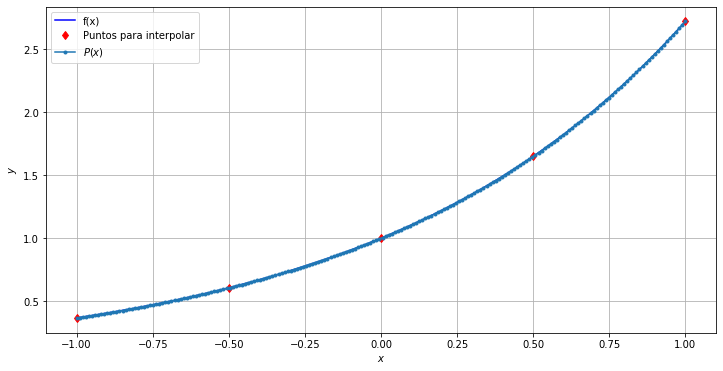

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(x_e, y_e, 'b-', label="f(x)")
plt.plot(x_i, y_i, 'rd', label="Puntos para interpolar")
plt.plot(x_e, P(x_e), '.-', label=r'$P(x)$')
plt.grid(True)
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [12]:
N = 10
Ns = 10 * np.arange(1, N + 1) # Number of nodes for interpolation
errors = np.zeros(Ns.shape[-1])

In [15]:
# Compute error between interpolating polynomial and "real function"
for i in range(Ns.shape[-1]):
    # Interpolation nodes
    x_i = np.linspace(x_a, x_b, Ns[i])
    y_i = f(x_i)
    # Interpolation
    a = interpolateVandermonde(x_i, y_i)
    P = interpolatingPolynomial(a)
    p = P(x_e) # Polynomial evaluation
    errors[i] = error(y_e, p)

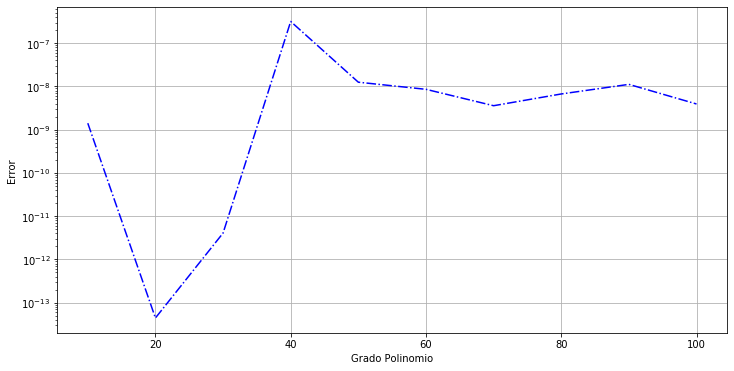

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(Ns, errors, 'b-.')
plt.grid(True)
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Grado Polinomio")
plt.show()